# Huishoudelijke toestelen verbruik in een woning

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,ensemble
from sklearn import metrics

# importing data

In [3]:
data=pd.read_csv('energydata_complete.csv',delimiter=',')

# Extra features ifv tijd

In [4]:
data.date=pd.to_datetime(data.date)
nsm=(data['date'] - data['date'].dt.normalize()) / pd.Timedelta(seconds=1)
data['nsm']=nsm

dow=data.date.dt.dayofweek
data['dow']=dow

month=data.date.dt.month
data['month']=month

hour=data.date.dt.hour
data['hour']=hour

# Data verkening

In [5]:
# Target en features in de dataset

target=data.columns[1]
features=data.columns[2:].values
print('Target is: '+target)
data=data.set_index('date')
data1=data.groupby(data.index.hour).mean()
data1.Appliances.plot()
plt.xlabel('uur van de dag')
plt.ylabel('Energieverbruik [Wh]')
plt.axis([0,23,0,200])print('Features zijn: '+features)

Target is: Appliances
['Features zijn: lights' 'Features zijn: T1' 'Features zijn: RH_1'
 'Features zijn: T2' 'Features zijn: RH_2' 'Features zijn: T3'
 'Features zijn: RH_3' 'Features zijn: T4' 'Features zijn: RH_4'
 'Features zijn: T5' 'Features zijn: RH_5' 'Features zijn: T6'
 'Features zijn: RH_6' 'Features zijn: T7' 'Features zijn: RH_7'
 'Features zijn: T8' 'Features zijn: RH_8' 'Features zijn: T9'
 'Features zijn: RH_9' 'Features zijn: T_out' 'Features zijn: Press_mm_hg'
 'Features zijn: RH_out' 'Features zijn: Windspeed'
 'Features zijn: Visibility' 'Features zijn: Tdewpoint'
 'Features zijn: rv1' 'Features zijn: rv2' 'Features zijn: nsm'
 'Features zijn: dow' 'Features zijn: month' 'Features zijn: hour']


(0.0, 23.0, 0.0, 200.0)

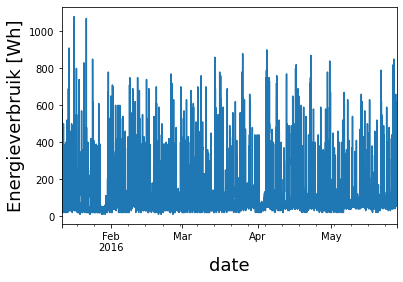

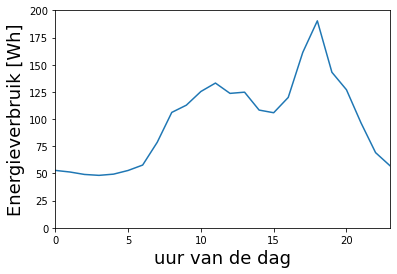

In [69]:


data.Appliances.plot()
plt.ylabel('Energieverbruik [Wh]')


data1=data.groupby(data.index.hour).mean()
plt.figure(2)
data1.Appliances.plot()
plt.xlabel('uur van de dag')
plt.ylabel('Energieverbruik [Wh]')
plt.axis([0,23,0,200])


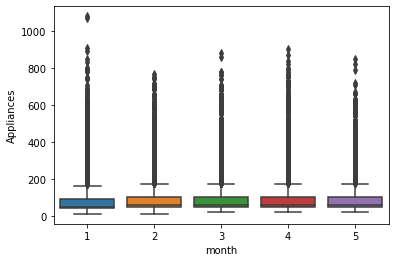

In [41]:
# Boxplot voor het energieverbruik per maand. 

sns.boxplot(data=data,x='month',y='Appliances')


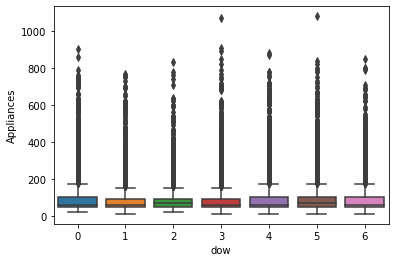

In [7]:
# Boxplot voor het energieverbruik per dag van de week. 0 is maandag en 6is zondag
sns.boxplot(data=data,x='dow',y='Appliances')

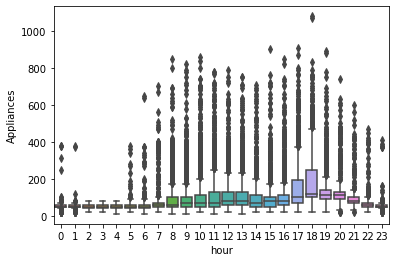

In [43]:
# Boxplot van het energieverbruik per uur van de dag

sns.boxplot(data=data,x='hour',y='Appliances')



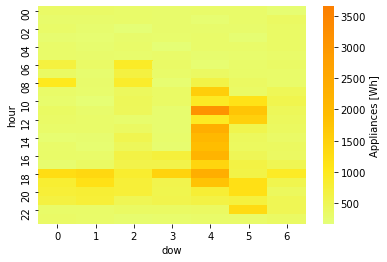

In [6]:
data3=data
data3['date']=pd.to_datetime(data3.date)
data3=data.set_index('date')
data3=data3.resample('H').sum()
data3['week']=data3.index.week
data3['dow']=data3.index.dayofweek
data3=data3[data3['week']==12]

data3['hour']=data3.index.strftime('%H')
app=data3.pivot_table(index='hour',columns='dow',values='Appliances')
ax = sns.heatmap(app,cmap='Wistia',vmin=170,vmax=3650, cbar_kws={'label': 'Appliances [Wh]', 'orientation': 'vertical'})

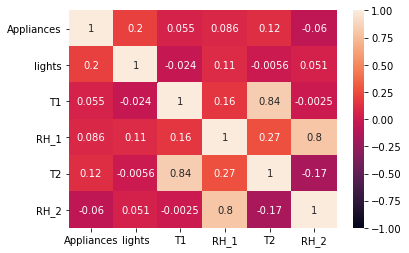

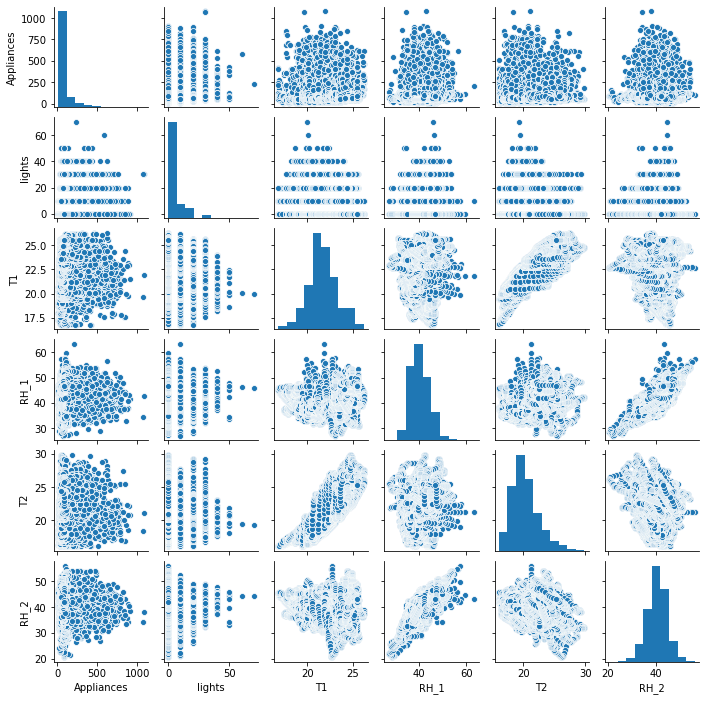

In [45]:
# Pairs correalation plot voor verschillende sub-groepen van de dataset
sub1=data[['Appliances','lights','T1','RH_1','T2','RH_2']]
hmap=sns.heatmap(sub1.corr(),vmin=-1,vmax=1,annot=True)
sns.pairplot(sub1,height=1.6)

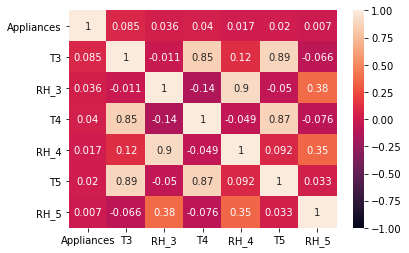

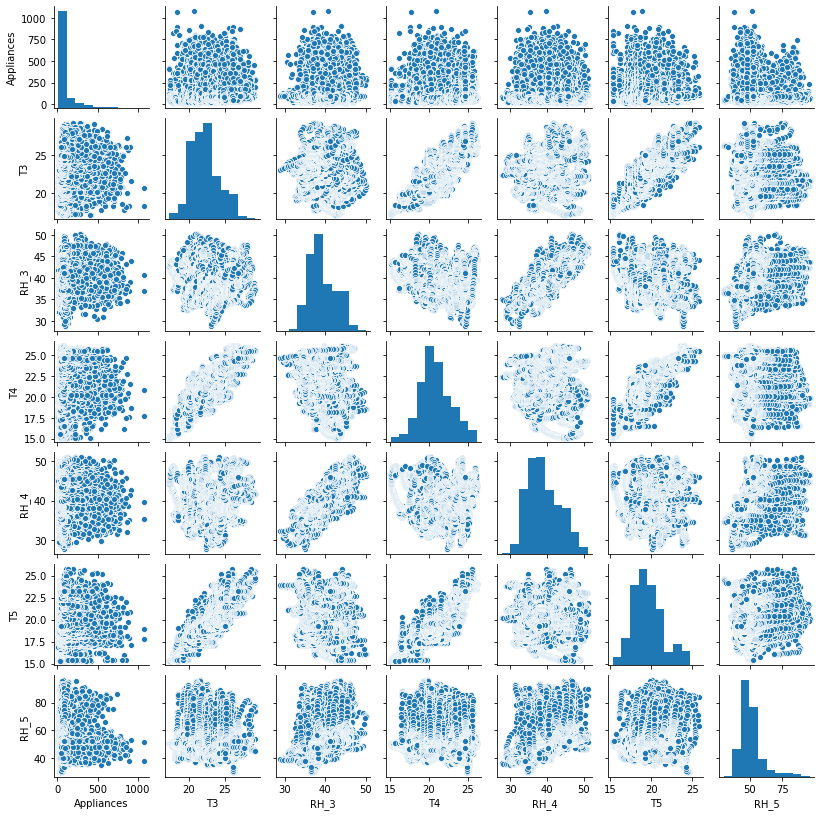

In [28]:
sub2=data[['Appliances','T3','RH_3','T4','RH_4','T5','RH_5']]
hmap=sns.heatmap(sub2.corr(),vmin=-1,vmax=1,annot=True)
sns.pairplot(sub2,height=1.6)

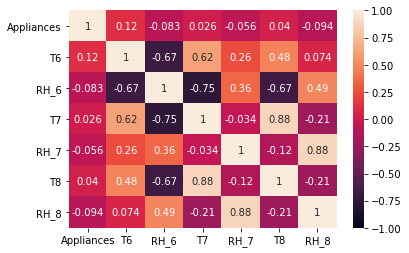

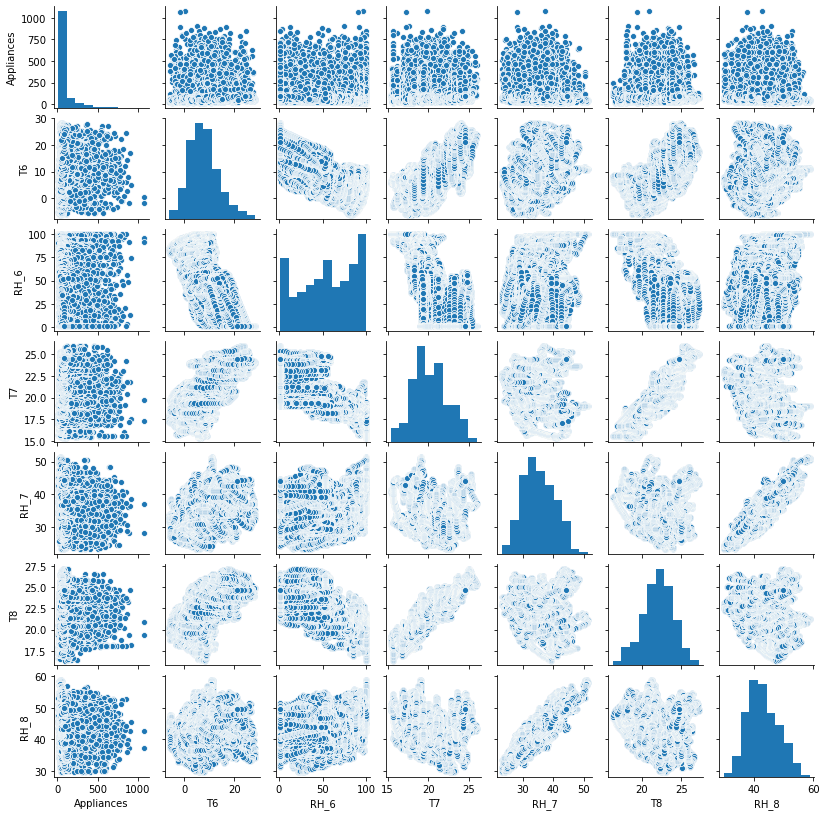

In [29]:
sub3=data[['Appliances','T6','RH_6','T7','RH_7','T8','RH_8']]
hmap=sns.heatmap(sub3.corr(),vmin=-1,vmax=1,annot=True)
sns.pairplot(sub3,height=1.6)

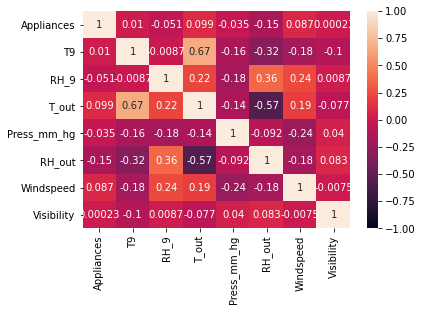

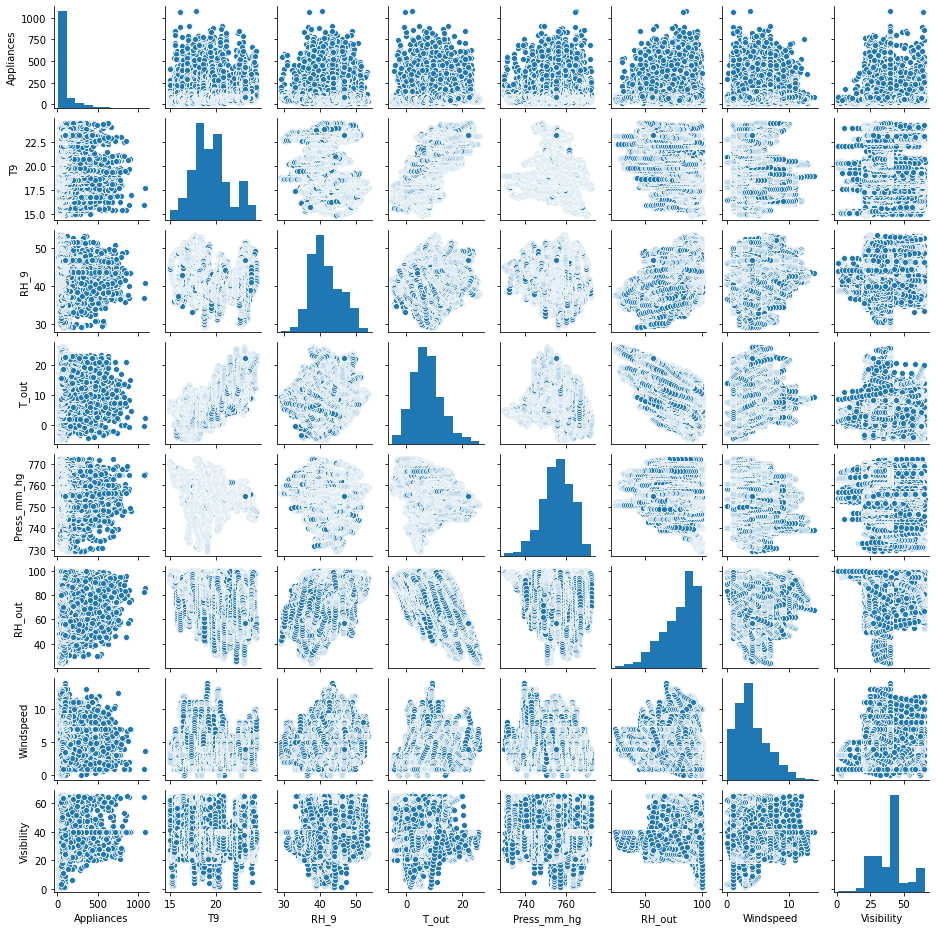

In [30]:
sub4=data[['Appliances','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility']]
hmap=sns.heatmap(sub4.corr(),vmin=-1,vmax=1,annot=True)
sns.pairplot(sub4,height=1.6)

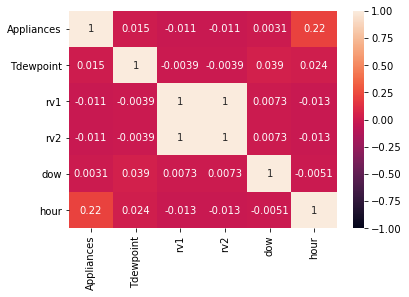

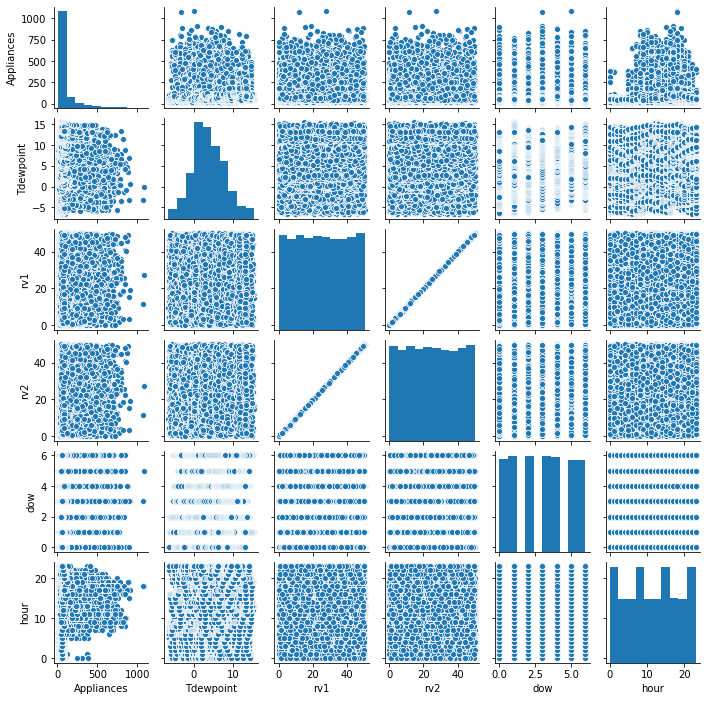

In [31]:
sub5=data[['Appliances','Tdewpoint','rv1','rv2','dow','hour']]
hmap=sns.heatmap(sub5.corr(),vmin=-1,vmax=1,annot=True)
sns.pairplot(sub5,height=1.6)

Text(0.5, 1.0, 'Toepassingen')

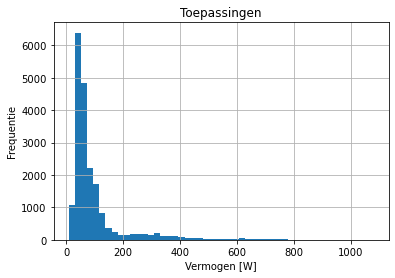

In [46]:
# Duration curve

data.Appliances.hist(bins=50)
plt.xlabel('Vermogen [W]')
plt.ylabel('Frequentie')
plt.title('Toepassingen')

# Data pre-processing

In [9]:
dataN=preprocessing.normalize(data[data.columns[1:]],norm='max',axis=0)
x=dataN[:,1:]
y = dataN[:,0]
y = y.ravel()

# Splitsen de dataset in training en test

In [10]:
# 80% van de dataset voor training en de rest voor test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Lineaire regressie

In [71]:
from sklearn import linear_model

linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)
y_targetLR=linreg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_targetLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_targetLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_targetLR)))
print('Determination coefficient:', np.sqrt(metrics.r2_score(y_test, y_targetLR)))
print('Explained variance:', np.sqrt(metrics.explained_variance_score(y_test, y_targetLR)))


df=pd.DataFrame({'Features':data.columns[2:],'Coeff':linreg.coef_})
df=df.sort_values('Coeff',ascending=False)
plt.bar(df.Features,df.Coeff)
plt.xticks(df.Features,rotation=60)

Mean Absolute Error: 0.05037493786185815
Mean Squared Error: 0.00826172997653796
Root Mean Squared Error: 0.09089405908274732
Determination coefficient: 0.39256534243552377
Explained variance: 0.39285733019134933


ValueError: arrays must all be same length

# Forecasting - Support Vector Machine regressie


Beste C waarde : [35]
Beste gamma waarde : [28]


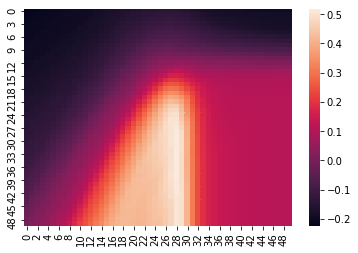

In [25]:
dataN=preprocessing.normalize(data[data.columns[1:]],norm='max',axis=0)
x=dataN[:,1:]
y = dataN[:,0]
y = y.ravel()

# Split data in training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=0)
X_traiN, x_val, y_traiN, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#### Train SVR algoritme
import sklearn

## Zoeken beste waarden voor hyperparameters

a=np.logspace(-2,3,num=50)
r2=np.zeros((a.size,a.size))
for i in np.arange(0,a.size,1):
    for j in np.arange(0,a.size,1):
        sv=sklearn.svm.SVR(kernel='rbf',C=a[i],gamma=a[j])
        svre=sv.fit(x_val,y_val)
        r2[i,j]=sv.score(x_val,y_val)
        
result = np.where(r2 == np.max(r2))
c=result[0]
gam=result[1]

print('Beste C waarde :', a[c][0])
print('Beste gamma waarde :', a[gam][0])

sns.heatmap(r2)


In [59]:
# Trainen het algoritme
import sklearn
sv=sklearn.svm.SVR(kernel='rbf',C=a[c][0],gamma=a[gam][0]) #  
svre=sv.fit(X_train,y_train)
ytargetSVR=sv.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytargetSVR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ytargetSVR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ytargetSVR)))
print('Determination coefficient:', np.sqrt(metrics.r2_score(y_test, ytargetSVR)))
print('Explained variance:', np.sqrt(metrics.explained_variance_score(y_test, ytargetSVR)))

Mean Absolute Error: 0.06594568046203772
Mean Squared Error: 0.0077125476138340645
Root Mean Squared Error: 0.08782111143588463
Determination coefficient: 0.4586246794019095
Explained variance: 0.46193043727992045


# Feature selectie met Recursive Feature Elimination - RFE

([<matplotlib.axis.XTick at 0x245a83efbb0>,
 <a list of 31 Text major ticklabel objects>)

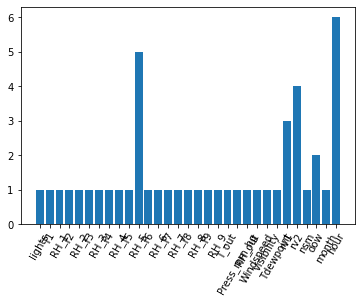

In [12]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear",C=1,epsilon=0.1)
selector = RFE(estimator,n_features_to_select=26, step=1)
selector = selector.fit(X_train, y_train)
selector.support_
sub=np.zeros(selector.support_.size)
for i in np.arange(0,selector.support_.size):
    if selector.support_[i]==True:
        sub[i]=1
    else:
        sub[i]=-1
selector.ranking_
plt.bar(data.columns[2:],selector.ranking_)
plt.rcParams["axes.labelsize"] = 18
plt.xticks(data.columns[2:],rotation=60)

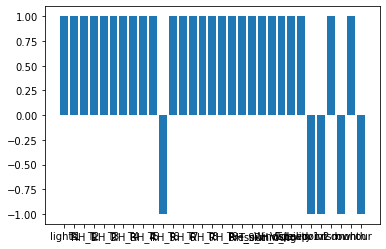

In [67]:
plt.bar(data.columns[2:],sub)
plt.rcParams["axes.labelsize"] = 18

In [13]:
# Features met negatieve support waarde zullen geelimineerd worden van de dataset
x_filtered = selector.transform(x)

In [14]:
# Splitsing van data in training en test moet opnieuw gebeuren maar nu met de nieuwe verzameling van features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=0)

In [71]:
# De SVR algoritme kan opnieuw getraind worden met code van boven


# Splitsen opnieuw de oorspronkelijke data

In [78]:
# 80% van de dataset voor training en de rest voor test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Random Forest - regressie

In [18]:
rf =ensemble.RandomForestRegressor(n_estimators=50,max_features='sqrt',oob_score=True)
rafo=rf.fit(X_train,y_train)
ytarget=rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytarget))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ytarget))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ytarget)))
print('Determination coefficient:', np.sqrt(metrics.r2_score(y_test, ytarget)))
print('Explained variance:', np.sqrt(metrics.explained_variance_score(y_test, ytarget)))

Mean Absolute Error: 0.030548001764115262
Mean Squared Error: 0.004310266570467473
Root Mean Squared Error: 0.06565262043869592
Determination coefficient: 0.7474526154673241
Explained variance: 0.747518797555121


## Variable importance met Random Forest

([<matplotlib.axis.XTick at 0x1d3a1b17700>,
 <a list of 31 Text major ticklabel objects>)

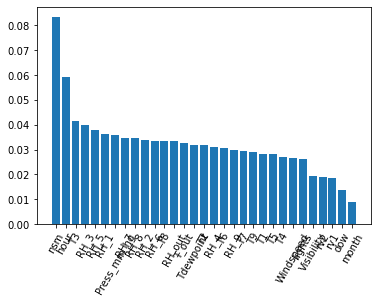

In [80]:
a=rafo.feature_importances_
df=pd.DataFrame({'Feat':data.columns[2:],'Importance':a})
df_sorted=df.sort_values('Importance',ascending=False)
plt.bar(df_sorted.Feat,df_sorted.Importance)
plt.xticks(df_sorted.Feat,rotation=60)

# Feature selectie met Boruta algoritme

([<matplotlib.axis.XTick at 0x1d3b0f91850>,
 <a list of 31 Text major ticklabel objects>)

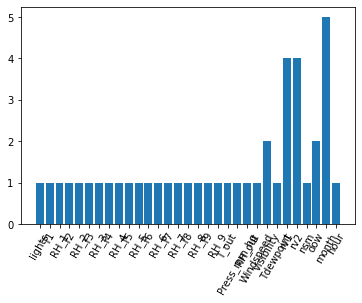

In [86]:
# De BORUTA librarie is niet inbegrepen in de installatie van ANACONDA. Om BORUTA te installeren:
# 1. Open de ANACONDA PROMPT
# 2. Type: conda install –c conda-forge boruta_py
# 3. Ga verder als volg

from boruta import BorutaPy
rf =ensemble.RandomForestRegressor(n_estimators=50,max_features='sqrt',oob_score=True)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, max_iter=100)


# find all relevant features 
feat_selector.fit(x, y)

# check selected features 
feat_selector.support_

# check ranking of features
feat_selector.ranking_
plt.figure(2)
plt.bar(data.columns[2:],feat_selector.ranking_)
plt.rcParams["axes.labelsize"] = 14
plt.xticks(data.columns[2:],rotation=60)

In [87]:
# call transform() on X to filter it down to selected features
x_filtered = feat_selector.transform(x,weak=False)

In [88]:
# Splits de filtered data in training en test data

X_train, X_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=0)

In [89]:
# Train de random forest algoritme opnieuw. Merk de verandering in de R2 waarde op.

# Gradient Boosting Machine

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.4,random_state=0)
gbr.fit(X_train,y_train)
y_targetGBR=gbr.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_targetGBR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_targetGBR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_targetGBR)))
print('Determination coefficient:', np.sqrt(metrics.r2_score(y_test, y_targetGBR)))
print('Explained variance:', np.sqrt(metrics.explained_variance_score(y_test, y_targetGBR)))

Mean Absolute Error: 0.03753346781118212
Mean Squared Error: 0.005066865407347734
Root Mean Squared Error: 0.07118191769928466
Determination coefficient: 0.6936999681916469
Explained variance: 0.693943008429396


# Hoe vergelijken zich de verschillende methoden

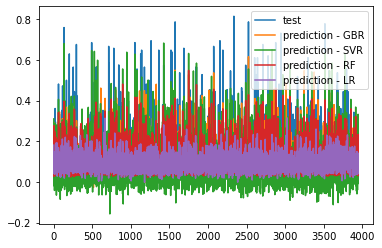

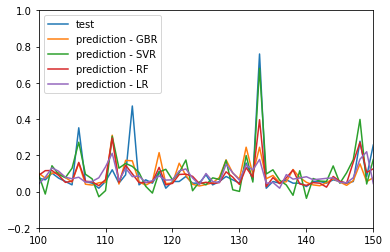

In [57]:
plt.plot(y_test,label='test')
plt.plot(y_targetGBR,label='prediction - GBR')
plt.plot(ytargetSVR,label='prediction - SVR')
plt.plot(ytarget,label='prediction - RF') 
plt.plot(y_targetLR,label='prediction - LR')
plt.legend()

fig,ax2=plt.subplots()
ax2.axis([100,150,-.2,1])
ax2.plot(y_test,label='test')
ax2.plot(y_targetGBR,label='prediction - GBR')
ax2.plot(ytargetSVR,label='prediction - SVR')
ax2.plot(ytarget,label='prediction - RF') 
ax2.plot(y_targetLR,label='prediction - LR')
ax2.legend()